In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
ticker = "AAPL"

data = yf.download(ticker, start="2018-01-01", end="2024-01-01")

data.head()

/var/folders/0y/lmsdkyqj23v4vl5vg7ft49lm0000gn/T/ipykernel_53416/323660470.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341885,40.351254,39.639309,39.850084,102223600
2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2018-01-04,40.522221,40.625266,40.299739,40.407465,89738400
2018-01-05,40.983574,41.070224,40.526901,40.618235,94640000
2018-01-08,40.831348,41.126429,40.732985,40.831348,82271200


In [6]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [11]:
data = data[["Close"]].dropna()

data["returns"] = data["Close"].pct_change()

data["vol_20"] = data["returns"].rolling(window=20).std()
data["vol_60"] = data["returns"].rolling(window=60).std()

data.head(25)

Price,Close,returns,vol_20,vol_60
Ticker,AAPL,,,
Date,,,,
2018-01-02,40.341885,NaN,NaN,NaN
2018-01-03,40.334854,-0.000174,NaN,NaN
2018-01-04,40.522221,0.004645,NaN,NaN
2018-01-05,40.983574,0.011385,NaN,NaN
2018-01-08,40.831348,-0.003714,NaN,NaN
2018-01-09,40.826679,-0.000114,NaN,NaN
2018-01-10,40.817291,-0.000230,NaN,NaN
2018-01-11,41.049149,0.005680,NaN,NaN


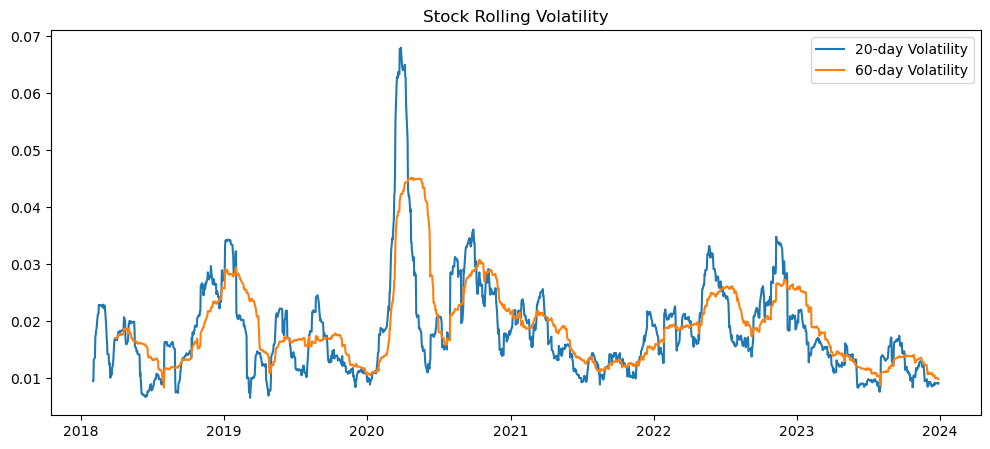

In [12]:
plt.figure(figsize=(12,5))
plt.plot(data["vol_20"], label="20-day Volatility")
plt.plot(data["vol_60"], label="60-day Volatility")
plt.title("Stock Rolling Volatility")
plt.legend()
plt.show()

In [14]:
tickers = ["AAPL", "MSFT", "TSLA", "JPM", "SPY"]

In [16]:
data = yf.download(tickers, start="2018-01-01", end="2024-01-01")["Close"]

data.head()

/var/folders/0y/lmsdkyqj23v4vl5vg7ft49lm0000gn/T/ipykernel_53416/3836696425.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", end="2024-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,JPM,MSFT,SPY,TSLA
Date,,,,,
2018-01-02,40.341885,86.730354,79.050377,237.909164,21.368668
2018-01-03,40.334854,86.818733,79.418259,239.413971,21.150000
2018-01-04,40.522221,88.062469,80.117241,240.423004,20.974667
2018-01-05,40.983574,87.497131,81.110573,242.025208,21.105333
2018-01-08,40.831348,87.626366,81.193344,242.467804,22.427334


In [17]:
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,JPM,MSFT,SPY,TSLA
Date,,,,,
2018-01-03,-0.000174,0.001019,0.004654,0.006325,-0.010233
2018-01-04,0.004645,0.014326,0.008801,0.004215,-0.008290
2018-01-05,0.011385,-0.006420,0.012398,0.006664,0.006230
2018-01-08,-0.003714,0.001477,0.001020,0.001829,0.062638
2018-01-09,-0.000114,0.005069,-0.000680,0.002263,-0.008085


In [18]:
vol_20 = returns.rolling(window=20).std()
vol_60 = returns.rolling(window=60).std()

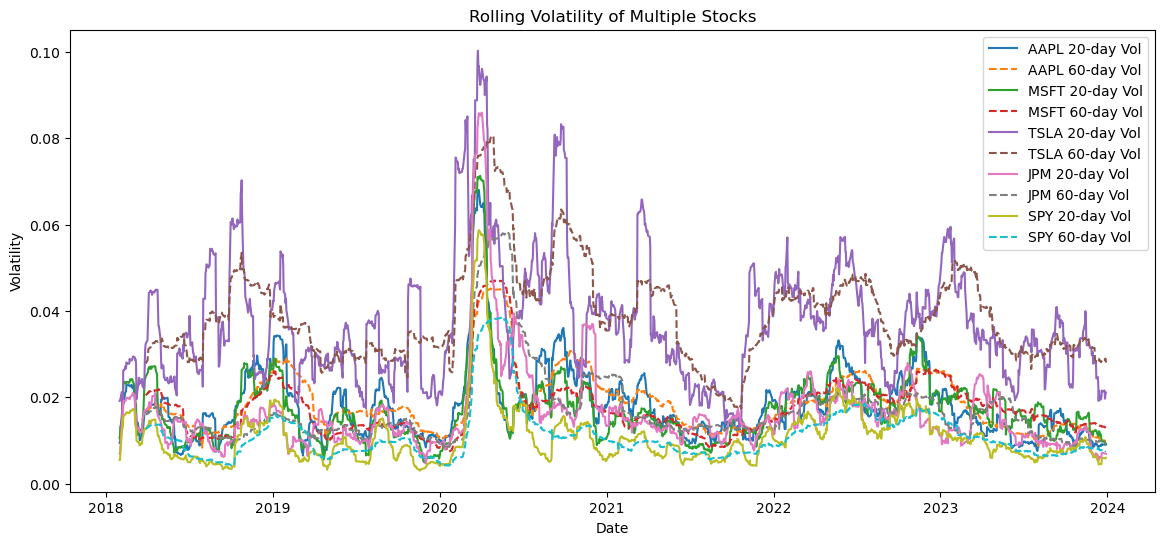

In [19]:
plt.figure(figsize=(14,6))

for ticker in tickers:
    plt.plot(vol_20[ticker], label=f"{ticker} 20-day Vol")
    plt.plot(vol_60[ticker], label=f"{ticker} 60-day Vol", linestyle="--")

plt.title("Rolling Volatility of Multiple Stocks")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [27]:
relative_vol = vol_20.div(vol_20["SPY"], axis=0)
relative_vol.head()

Ticker,AAPL,JPM,MSFT,SPY,TSLA
Date,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN


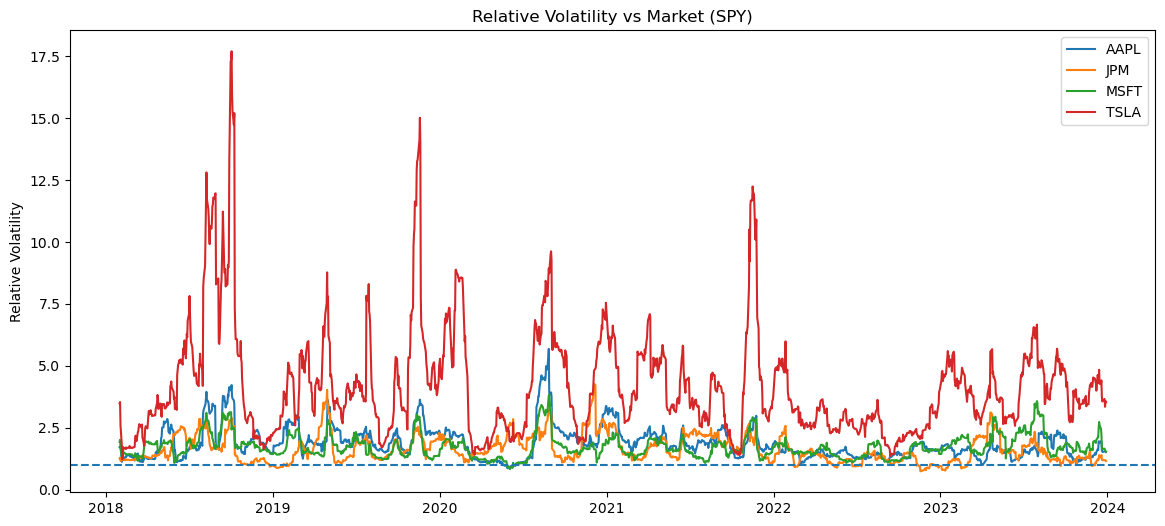

In [51]:
plt.figure(figsize=(14,6))

for ticker in relative_vol.columns:
    if ticker != "SPY":
        plt.plot(relative_vol[ticker], label=ticker)

plt.axhline(1, linestyle="--")
plt.title("Relative Volatility vs Market (SPY)")
plt.ylabel("Relative Volatility")
plt.legend()
plt.show()
        

In [30]:
vol_20.describe()

Ticker,AAPL,JPM,MSFT,SPY,TSLA
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,0.018190,0.016396,0.017263,0.010823,0.037485
std,0.008621,0.010394,0.008613,0.007155,0.014343
min,0.006527,0.004689,0.004917,0.003002,0.013188
25%,0.012491,0.011231,0.011745,0.006433,0.027633
50%,0.016289,0.014058,0.015837,0.009246,0.034997
75%,0.021354,0.017826,0.020816,0.013208,0.044301
max,0.068004,0.085945,0.071274,0.058701,0.100268


In [32]:
summary = pd.DataFrame({
    "Average Volatility": vol_20.mean(),
    "Max Volatility": vol_20.max(),
    "75th Percentile Vol": vol_20.quantile(0.75)
})
summary

,Average Volatility,Max Volatility,75th Percentile Vol
Ticker,,,
AAPL,0.018190,0.068004,0.021354
JPM,0.016396,0.085945,0.017826
MSFT,0.017263,0.071274,0.020816
SPY,0.010823,0.058701,0.013208
TSLA,0.037485,0.100268,0.044301


In [33]:
summary = summary.sort_values("Average Volatility", ascending=False)
summary

,Average Volatility,Max Volatility,75th Percentile Vol
Ticker,,,
TSLA,0.037485,0.100268,0.044301
AAPL,0.018190,0.068004,0.021354
MSFT,0.017263,0.071274,0.020816
JPM,0.016396,0.085945,0.017826
SPY,0.010823,0.058701,0.013208


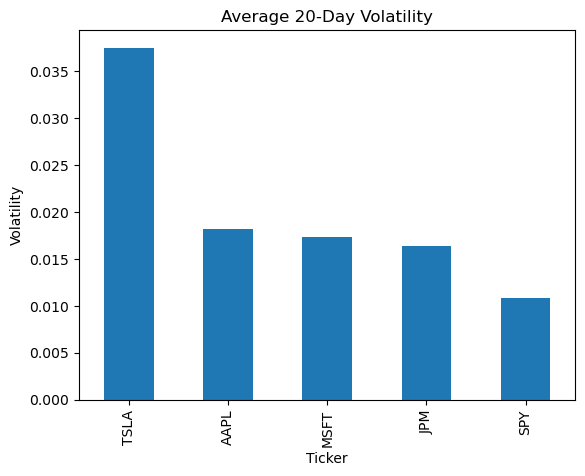

In [39]:
summary["Average Volatility"].plot(kind="bar", title="Average 20-Day Volatility")
plt.ylabel("Volatility")
plt.show()

In [ ]:
# Insight: 
# TSlA is the most volatile stock among these 5 stocks. Its price is driven by retail sentiment, aggressive growth
# expectations and "headline" risk whereas AAPL, JPM and MSFT are more mature and stable compagnies.

In [40]:
relative_vol60 = vol_60.div(vol_60["SPY"], axis=0)
relative_vol60.head()

Ticker,AAPL,JPM,MSFT,SPY,TSLA
Date,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN


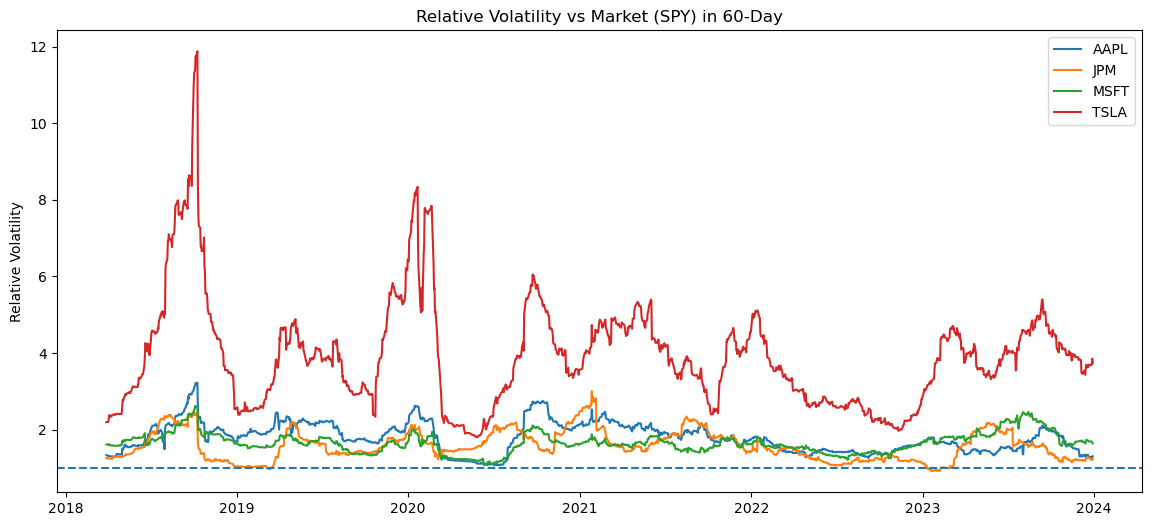

In [41]:
plt.figure(figsize=(14,6))

for ticker in relative_vol60.columns:
    if ticker != "SPY":
        plt.plot(relative_vol60[ticker], label=ticker)

plt.axhline(1, linestyle="--")
plt.title("Relative Volatility vs Market (SPY) in 60-Day")
plt.ylabel("Relative Volatility")
plt.legend()
plt.show() 

In [46]:
summary60 = pd.DataFrame({
    "Average Volatility (60-Day)": vol_60.mean(),
    "Max Volatility (60-Day)": vol_60.max(),
    "75th Percentile Vol (60-Day)": vol_60.quantile(0.75)
})
summary60

,Average Volatility (60-Day),Max Volatility (60-Day),75th Percentile Vol (60-Day)
Ticker,,,
AAPL,0.018898,0.045181,0.022276
JPM,0.017136,0.058376,0.018964
MSFT,0.017794,0.047044,0.021034
SPY,0.011338,0.038661,0.013534
TSLA,0.039006,0.080515,0.045293


In [47]:
summary60 = summary60.sort_values("Average Volatility (60-Day)", ascending=False)
summary60

,Average Volatility (60-Day),Max Volatility (60-Day),75th Percentile Vol (60-Day)
Ticker,,,
TSLA,0.039006,0.080515,0.045293
AAPL,0.018898,0.045181,0.022276
MSFT,0.017794,0.047044,0.021034
JPM,0.017136,0.058376,0.018964
SPY,0.011338,0.038661,0.013534


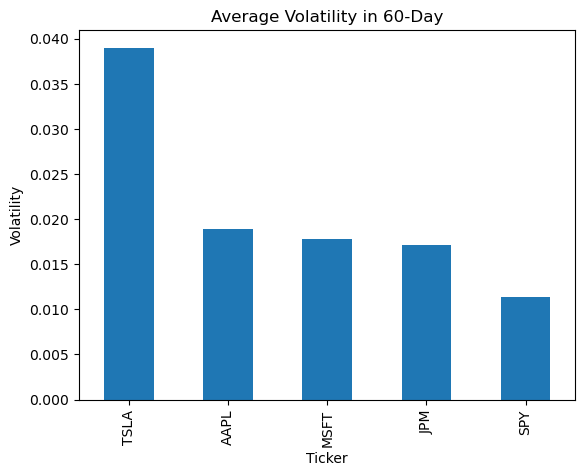

In [49]:
summary60["Average Volatility (60-Day)"].plot(kind="bar", title="Average Volatility in 60-Day")
plt.ylabel("Volatility")
plt.show()

In [52]:
threshold = vol_20["SPY"].quantile(0.75)
threshold

np.float64(0.013207737134413018)

In [53]:
high_vol_days = vol_20["SPY"] > threshold
high_vol_days.head()

Date
2018-01-03    False
2018-01-04    False
2018-01-05    False
2018-01-08    False
2018-01-09    False
Name: SPY, dtype: bool

In [61]:
stress_vol = vol_20[high_vol_days].mean()
normal_vol = vol_20[~high_vol_days].mean()

regime_comparison = pd.DataFrame({
    "Normal Market Vol": normal_vol,
    "High Market Vol": stress_vol
})

regime_comparison["Volatility Increase"] = (
    regime_comparison["High Market Vol"]
    - regime_comparison["Normal Market Vol"]
)

regime_comparison["Relative Increase (%)"] = (
    regime_comparison["Volatility Increase"]
    / regime_comparison["Normal Market Vol"]
) * 100

regime_comparison = regime_comparison.sort_values("Relative Increase (%)", ascending=False)
regime_comparison

,Normal Market Vol,High Market Vol,Volatility Increase,Relative Increase (%)
Ticker,,,,
SPY,0.008027,0.019220,0.011193,139.441457
JPM,0.013228,0.025908,0.012680,95.855234
MSFT,0.014116,0.026714,0.012598,89.250704
AAPL,0.015173,0.027249,0.012076,79.586531
TSLA,0.034588,0.046182,0.011594,33.518876
